HASH

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from matplotlib import pyplot as plt
import sklearn as sk
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Hash/heartd.csv")
sample_size=len(df.index)
df

,age,sex,Bp,Hr,os,output
0,62,1,130,146,93.3,1
1,44,0,108,175,94.0,1
2,64,1,125,131,97.8,0
3,41,1,135,132,95.6,1
4,54,1,120,147,95.4,1
...,...,...,...,...,...,...
209,77,1,125,162,96.8,0
210,53,1,142,111,95.3,1
211,62,0,124,163,94.4,1
212,63,1,145,150,93.0,1


In [ ]:
#Set x and y
x=df.loc[:,:'os']
y=df.loc[:,['output']]
print(x.head())
print(x.shape)
print(y.shape)
print(x.to_numpy().shape)

   age  sex   Bp   Hr    os
0   62    1  130  146  93.3
1   44    0  108  175  94.0
2   64    1  125  131  97.8
3   41    1  135  132  95.6
4   54    1  120  147  95.4
(214, 5)
(214, 1)
(214, 5)


In [ ]:
#Preprocessing://
scaler=sk.preprocessing.StandardScaler().fit(x)
X=scaler.transform(x)

num_classes=2
Y=keras.utils.to_categorical(y,num_classes)

In [ ]:
print("X_s is",X[2])
X=X.reshape(sample_size,5).astype('float32')
Y=Y.reshape(sample_size,2).astype('float32')
print("X.shape is ",X.shape,"Y shape is ",Y.shape)

X_s is [ 1.07286375  0.67511652 -0.41055574 -0.88243845  0.91974465]
X.shape is  (214, 5) Y shape is  (214, 2)


In [ ]:

dataset=tf.data.Dataset.from_tensor_slices((X,Y))

In [ ]:
c=0;
for element in dataset :
  print(element)
  break;  


(<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([ 0.84952444,  0.67511654, -0.12040076, -0.20233582, -1.6381513 ],
      dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 1.], dtype=float32)>)


In [ ]:
train_size=int(0.8*sample_size)
test_size=int(0.1*sample_size)
val_size=int(0.1*sample_size)
print("Train size,Test size,Val size",train_size,test_size,val_size)

train_dataset=dataset.take(train_size)
test_dataset=dataset.skip(train_size)
val_dataset=test_dataset.skip(val_size)
test_dataset=test_dataset.take(test_size)

batch_size=128
train_dataset=train_dataset.shuffle(buffer_size=1024).batch(batch_size)
test_dataset=test_dataset.shuffle(buffer_size=1024).batch(batch_size)
val_dataset=val_dataset.shuffle(buffer_size=1024).batch(batch_size)

Train size,Test size,Val size 171 21 21


In [ ]:
#//Model 
inputs=keras.Input(shape=(5,),name='inputs')
flat=keras.layers.Flatten()(inputs)
x=layers.Dense(64,activation='sigmoid',name='dense_1')(flat)
x=layers.Dense(64,activation='tanh',name='dense_2')(x)
outputs=layers.Dense(2,activation='softmax',name="predn")(x)

model=keras.Model(inputs=inputs,outputs=outputs)

optimizer='adam'
loss="binary_crossentropy"
metrics_key='accuracy'
epochs=150


In [ ]:
model.compile(loss=loss,optimizer=optimizer,metrics=[metrics_key])

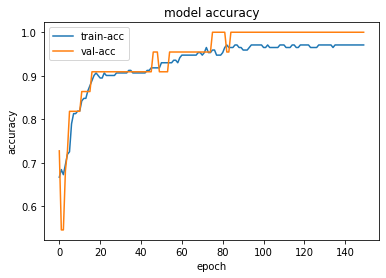

In [ ]:
#//Training
tf.keras.backend.clear_session()
history=model.fit(train_dataset,epochs=epochs,verbose=0,validation_data=val_dataset)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train-acc', 'val-acc'], loc='upper left')
plt.show()


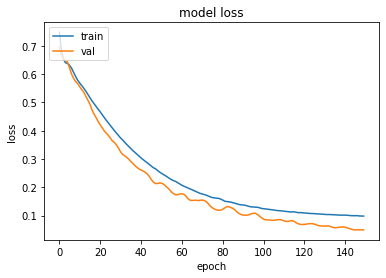

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(test_dataset, verbose = 1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 22ms/step - loss: 0.0913 - accuracy: 0.9524
Test loss: 0.09128419309854507
Test accuracy: 0.9523809552192688


In [ ]:
import pickle 
pickle.dump(model,open('model2.pkl','wb'))

INFO:tensorflow:Assets written to: ram://60a81570-5a10-45ef-bc4d-d4218bf46010/assets


In [ ]:
#Testing
print(test_dataset)
for element in test_dataset:
  k = (element[0][0]).numpy()
  j = (element[1][0]).numpy()
  print(k)
  print(k.shape)
  print(j.shape)
  print(k[np.newaxis,::].shape)
  n=2
  k=k.reshape(1,5).astype('float32')
  pred = model.predict(k)
  print("original",j[1],"Prediction ",np.argmax(pred))
  print("Prediction List",pred)
  break


<BatchDataset shapes: ((None, 5), (None, 2)), types: (tf.float32, tf.float32)>
[ 1.7428818   0.67511654  1.6205292  -1.7439017  -0.10341372]
(5,)
(2,)
(1, 5)
original 0.0 Prediction  0
Prediction List [[0.60641044 0.3935896 ]]
